# Proyecto Final : Airline Passenger Satisfaction

# Parte 1: Análisis y pre-procesamiento de los datos

#### Realizado por Javier Gómez Moraleda y Unai Piris Ibañez

El dataset se encuentra disponible a través del siguiente enlace: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pandas.io.parsers import read_csv
from IPython.display import display

## Análisis de los datos

In [2]:
# Cargamos y visualizamos los datos en una tabla
raw_data = pd.DataFrame(read_csv('data/raw/train.csv'))
display(raw_data)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [3]:
# Distribución de una variable
def plot_column(column_name):
    plt.figure(figsize=(4, 4)) 
    raw_data[column_name].value_counts().plot.bar(rot=0, title = column_name)
    plt.savefig('figures/parte1/' + column_name + ".png")
    plt.show()

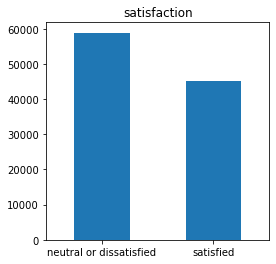

In [4]:
# Distribución de la variable a predecir
plot_column('satisfaction')

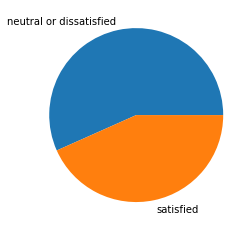

In [5]:
# Gráfico de tarta con la variable a predecir
plt.pie(raw_data['satisfaction'].value_counts(), labels = ['neutral or dissatisfied', 'satisfied'])
plt.savefig('figures/parte1/satisfaction_pie.png')

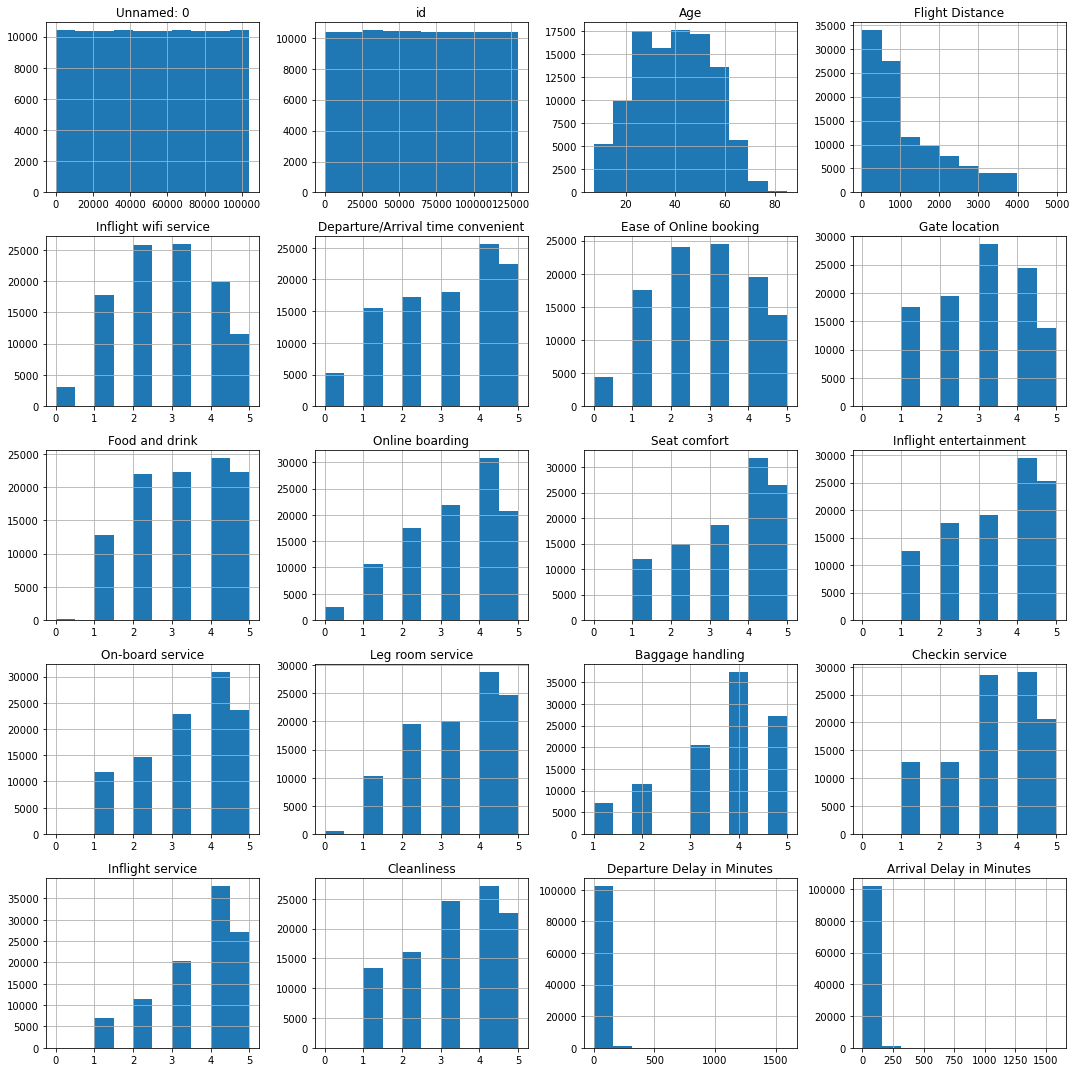

In [6]:
# Histograma
raw_data.hist(figsize=(15,15))
plt.savefig('figures/parte1/histograma.png')
plt.tight_layout()

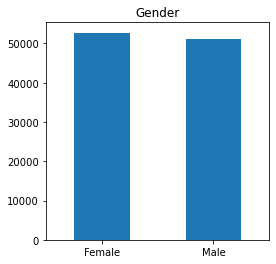

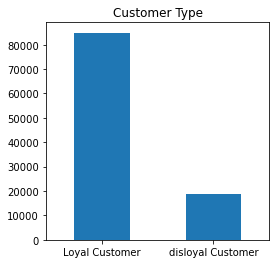

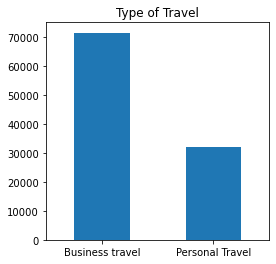

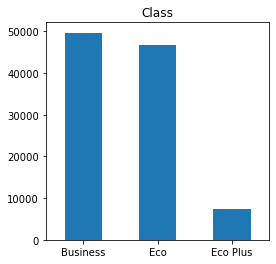

In [7]:
# Distribución de las variables no numéricas
plot_column('Gender')
plot_column('Customer Type')
plot_column('Type of Travel')
plot_column('Class')

## Preprocesamiento

In [8]:
# Comprobación de valores nulos en el conjunto de entrenamiento
raw_data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [9]:
# Eliminamos nulos
raw_data = raw_data.dropna()

# Eliminamos el número de fila
raw_data.drop(raw_data.columns[0], axis=1, inplace=True)

# Eliminamos la columna de identificadores
raw_data.drop(raw_data.columns[0], axis=1, inplace=True)

In [10]:
# Reducción del dataset a un total de 10k filas
data = raw_data.drop(index=raw_data.index[10000:])
data.shape

(10000, 23)

In [11]:
# Onehot para las columnas no numéricas
onehot_columns = ['Gender', 'Customer Type','Type of Travel','Class']
data = pd.get_dummies(data, prefix = onehot_columns, columns = onehot_columns)

# Movemos la predicción a la última columna
satisfaction = data.pop("satisfaction")
data.insert(27, "satisfaction", satisfaction)

# Convierte salida en un entero
label_encoder = LabelEncoder()
data["satisfaction"] = label_encoder.fit_transform(data["satisfaction"])

## Separación en conjuntos

In [12]:
# Separación entre train, validation y test
train, val_test = train_test_split(data, test_size = 0.40, random_state = 42, shuffle = False)
validation, test = train_test_split(val_test, test_size = 0.50, random_state = 42, shuffle = False)

In [13]:
# Tamaño de los conjuntos generados
print(train.shape)
print(validation.shape)
print(test.shape)

(6000, 28)
(2000, 28)
(2000, 28)


In [14]:
# La columna de la satisfacción no debe ser normalizada
train_columns = train.columns.difference(['satisfaction'])
test_columns = test.columns.difference(['satisfaction'])
validation_columns = validation.columns.difference(['satisfaction'])

# Calculamos media y desviación típica sobre el conjunto de entrenamiento
mu = train[train_columns].mean()
sigma = train[train_columns].std()

# Normalizamos
train[train_columns] = (train[train_columns] - mu) / sigma
test[test_columns] = (test[test_columns] - mu) / sigma
validation[validation_columns] = (validation[validation_columns] - mu) / sigma

C:\Users\Javier\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
pd.DataFrame(train).to_csv("data/processed/train_processed.csv")

In [16]:
pd.DataFrame(test).to_csv("data/processed/test_processed.csv")

In [17]:
pd.DataFrame(validation).to_csv("data/processed/validation_processed.csv")